<a href="https://colab.research.google.com/github/DeshanaShah2004/Des/blob/main/TSF_student_hours_Deshana_Vikas_Shah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data imported successfully
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25
Hours     0
Scores    0
dtype: int64


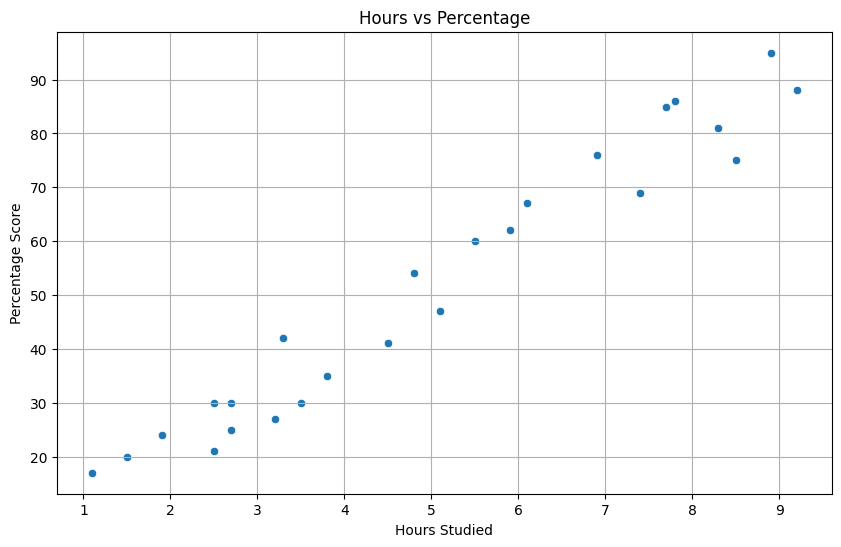

Training complete.


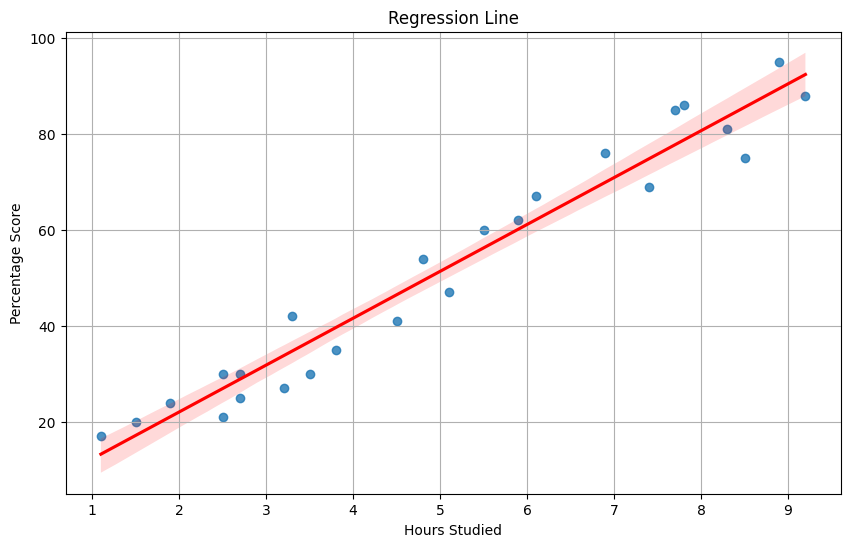

    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153
Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R^2 Score: 0.9678055545167994
Predictions saved to predictions.csv
Model saved to student_score_predictor_model.pkl


In [ ]:
#DESHANA VIKAS SHAH

# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib

# Read the data from the remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

# Display the first 10 rows of the dataset
print(s_data.head(10))

# Check for any missing values
print(s_data.isnull().sum())

# Plotting the distribution of scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Scores', data=s_data)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

# Define feature and target variables
X = s_data[['Hours']]
y = s_data['Scores']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours', y='Scores', data=s_data, line_kws={'color': 'red'})
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

# Predict the test set results
y_pred = regressor.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

# Save the predictions to an Excel CSV file
predictions_df = pd.DataFrame({'Hours': X_test['Hours'], 'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

# Save the trained model to a file
model_filename = 'student_score_predictor_model.pkl'
joblib.dump(regressor, model_filename)
print(f"Model saved to {model_filename}")


In [ ]:
import numpy as np
import joblib

# Load the saved model
model_filename = 'student_score_predictor_model.pkl'
regressor = joblib.load(model_filename)
print(f"Model loaded from {model_filename}")

# Function to predict score based on hours studied
def predict_score(hours):
    hours = np.array([[hours]])
    predicted_score = regressor.predict(hours)
    return predicted_score[0]

# Get user input
try:
    hours = float(input("Enter the number of hours studied: "))
    predicted_score = predict_score(hours)
    print(f"No of Hours = {hours}")
    print(f"Predicted Score = {predicted_score:.2f}")
except ValueError:
    print("Please enter a valid number for hours studied.")


Model loaded from student_score_predictor_model.pkl
Enter the number of hours studied: 9.25
No of Hours = 9.25
Predicted Score = 92.39


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
